In [26]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import sklearn.preprocessing
import sklearn.cluster
import sklearn.metrics
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Atualizem os seguintes arquivos no drive:
- Notebook: 'Não Supervisionado.ipynb'
- Dados: 'Clientes_Hipermercado.csv' (COLOCAR NA PASTA 'DATA')

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Testando se a conexão com o drive funcionou
df = pd.read_csv('drive/MyDrive/ASA Arcelor Mittal 2023/data/Clientes_Hipermercado.csv')
df.head(5)

,id_cliente,genero,idade,salario_anual,pontuacao_de_gastos
0,1,masculino,19,30000,39
1,2,masculino,21,30000,81
2,3,feminino,20,32000,6
3,4,feminino,23,32000,77
4,5,feminino,31,34000,40


# PCA - Redução de Dimensionalidade

## PCA - Exemplo 2 dimensões

In [29]:
# Criando e visualizando nossos dados
dados_pca2d = pd.DataFrame(data={
    'variavel_1': [99,  98,  97, 101, 102, 103],
    'variavel_2': [-1, -1, -2,  1,  1,  2]
})

fig_pca2d = px.scatter(data_frame=dados_pca2d, x='variavel_1', y='variavel_2', width=800)
fig_pca2d.update_traces(marker={'size': 12, 'color': 'red'})

In [30]:
# Carregando o algoritmo da PCA
pca_2 = PCA(n_components=2)
pca_2

PCA(n_components=2)

In [31]:
# Agora vamos fazer o encaixe do algoritmo nos nossos dados. Não precisamos normalizar, o sklearn já cuida disso automaticamente.
pca_2.fit(dados_pca2d)

PCA(n_components=2)

In [32]:
# Olhando o percentual de variância contido em cada componente principal
pca_2.explained_variance_ratio_

array([0.99244289, 0.00755711])

**As coordenadas da primeira componente principal (primeiro eixo) são suficientes para reter 99,24% da informação (“variância explicada”). O segundo componente principal adiciona 0,76% da informação ("variância explicada") que não está armazenada nas coordenadas do primeiro componente principal.**

In [33]:
# Projetando os dados nos novos eixos (componentes principais)
dados_trans_2 = pca_2.transform(dados_pca2d)
dados_trans_2 = pd.DataFrame(data=dados_trans_2, columns=['principal_component_1', 'principal_component_2'])
dados_trans_2

,principal_component_1,principal_component_2
0,1.383406,0.293579
1,2.221898,-0.251335
2,3.605304,0.042244
3,-1.383406,-0.293579
4,-2.221898,0.251335
5,-3.605304,-0.042244


**Pense na coluna 1 como a coordenada ao longo do primeiro componente principal (o primeiro novo eixo) e na coluna 2 como a coordenada ao longo do segundo componente principal (o segundo novo eixo).**

**Provavelmente você pode escolher apenas o primeiro componente principal, pois ele retém 99% das informações (variância explicada).**

In [34]:
# Visualizando o espaço após a transformação feita pela PCA
fig_pca2d_trans = px.scatter(data_frame=dados_trans_2, x='principal_component_1', y='principal_component_2', width=800)
fig_pca2d_trans.update_traces(marker={'size': 12, 'color': 'red'})

**Note que a componente principal 1 (eixo X) serpara muito bem todos os pontos, sem que seja necessária a componente principal 2 (eixo Y).**


**Podemos retornar os dados para os eixos originais usando `.inverse_transform()`**

In [35]:
dados_invertidos_2 = pca_2.inverse_transform(dados_trans_2)
dados_invertidos_2 = pd.DataFrame(data=dados_invertidos_2, columns=['variavel_1', 'variavel_2'])
dados_invertidos_2

,variavel_1,variavel_2
0,99.0,-1.0
1,98.0,-1.0
2,97.0,-2.0
3,101.0,1.0
4,102.0,1.0
5,103.0,2.0


In [36]:
fig_inv_pca2d = px.scatter(data_frame=dados_invertidos_2, x='variavel_1', y='variavel_2', width=800)
fig_inv_pca2d.update_traces(marker={'size': 12, 'color': 'red'})

In [37]:
# Como vamos plotar gráficos um pouco mais complexos, em alguns momentos usaremos o 'irmão mais velho' do plotly.express, o plotly.graph_objects, que embora tenha a mesma base nos dá mais liberdade.
import plotly.graph_objects as go

fig = go.Figure()
# Plotando os pontos no espaço original, opós a transformada inversa
fig.add_traces(go.Scatter(
    x=dados_invertidos_2['variavel_1'],
    y=dados_invertidos_2['variavel_2'],
    mode='markers',
    marker=dict(size=12, color='red'),
    name='pontos'
))
# Plotando os dois vetores das componentes principais
fig.add_traces(go.Scatter(
    x=[100, np.sqrt(pca_2.explained_variance_[0])*pca_2.components_[0][0] + 100],
    y=[0, np.sqrt(pca_2.explained_variance_[0])*pca_2.components_[0][1]],
    marker= dict(size=10,symbol= "arrow-bar-up", angleref="previous", color='black'),
    name='componente principal 1'
))
fig.add_traces(go.Scatter(
    x=[100, np.sqrt(pca_2.explained_variance_[1])*pca_2.components_[1][0] + 100],
    y=[0, np.sqrt(pca_2.explained_variance_[1])*pca_2.components_[1][1]],
    marker= dict(size=10,symbol= "arrow-bar-up", angleref="previous", color='black'),
    name='componente principal 2'
))
fig.update_layout(width=800)

**Mantendo apenas a primeira componente principal:**

In [38]:
# Mantendo apenas a primeira componente principal
pca_1 = PCA(n_components=1)
pca_1

PCA(n_components=1)

In [39]:
pca_1.fit(dados_pca2d)
pca_1.explained_variance_ratio_

array([0.99244289])

In [40]:
dados_trans_1 = pca_1.transform(dados_pca2d)
dados_trans_1 = pd.DataFrame(data=dados_trans_2, columns=['principal_component_1'])
dados_trans_1

,principal_component_1
0,1.383406
1,2.221898
2,3.605304
3,-1.383406
4,-2.221898
5,-3.605304


**Note que agora temos apenas a primeira coluna vista em `dados_trans_2`.**

In [41]:
# Fazendo a transformação inversa, agora temos os dados distribuídos ao longo de uma única componente principal
dados_invertidos_1 = pca_1.inverse_transform(dados_trans_1)
dados_invertidos_1 = pd.DataFrame(data=dados_invertidos_1, columns=['variavel_1', 'variavel_2'])

In [42]:
fig_inv_pca1d = px.scatter(data_frame=dados_invertidos_1, x='variavel_1', y='variavel_2', width=800)
fig_inv_pca1d.update_traces(marker={'size': 12, 'color': 'red'})

**No fim, o que fazemos com a PCA é eliminar as componentes onde os dados possuem pouca variância.**

## PCA - Exemplo 3 dimensões

In [43]:
# Função para gerar pontos aleatórios em formato circular
def random_point_circle(center=(0,0), radius=1, n=1):
    r = radius * np.sqrt(np.random.rand(n))
    theta = np.random.rand(n) * 2 * np.pi
    x = center[0] + r * np.cos(theta)
    y = center[1] + r * np.sin(theta)
    return np.array([x,y]).T

dados_pca3d = pd.DataFrame(random_point_circle(n = 300), columns = ['x','y'])
dados_pca3d['z'] = (dados_pca3d['x'] + dados_pca3d['y'])*1.5
dados_pca3d.head()

,x,y,z
0,-0.686894,0.021352,-0.998313
1,0.318631,-0.629856,-0.466837
2,-0.819799,-0.143059,-1.444288
3,-0.244412,-0.433317,-1.016593
4,-0.029067,0.568150,0.808626


In [44]:
fig_pca3d = px.scatter_3d(data_frame=dados_pca3d, x='x', y='y', z='z', width=800)
fig_pca3d.update_traces(marker={'size': 5, 'color': 'red'})

In [45]:
# Carregando o algoritmo da PCA
pca_3d = PCA(n_components=3)
# Agora vamos fazer o encaixe do algoritmo nos nossos dados. Não precisamos normalizar, o sklearn já cuida disso automaticamente.
pca_3d.fit(dados_pca3d)
# Olhando o percentual de variância contido em cada componente principal
print(pca_3d.explained_variance_ratio_)

[8.22994082e-01 1.77005918e-01 1.12333146e-32]


In [46]:
# Como vamos plotar gráficos um pouco mais complexos, usaremos o 'irmão mais velho' do plotly.express, o plotly.graph_objects, que embora tenha a mesma base nos dá mais liberdade.
import plotly.graph_objects as go

fig = go.Figure()
# Plotando os pontos no espaço original, opós a transformada inversa
fig.add_traces(go.Scatter3d(
    x=dados_pca3d['x'],
    y=dados_pca3d['y'],
    z=dados_pca3d['z'],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='pontos'
))
# Plotando os dois vetores das componentes principais
fig.add_traces(go.Scatter3d(
    x=[0, np.sqrt(pca_3d.explained_variance_[0])*pca_3d.components_[0][0]],
    y=[0, np.sqrt(pca_3d.explained_variance_[0])*pca_3d.components_[0][1]],
    z=[0, np.sqrt(pca_3d.explained_variance_[0])*pca_3d.components_[0][2]],
    marker= dict(size=7, color='black', symbol='diamond'),
    line= dict(width=10),
    name='componente principal 1'
))
fig.add_traces(go.Scatter3d(
    x=[0, np.sqrt(pca_3d.explained_variance_[1])*pca_3d.components_[1][0]],
    y=[0, np.sqrt(pca_3d.explained_variance_[1])*pca_3d.components_[1][1]],
    z=[0, np.sqrt(pca_3d.explained_variance_[1])*pca_3d.components_[1][2]],
    marker= dict(size=7, color='black', symbol='diamond'),
    line= dict(width=10),
    name='componente principal 2'
))
fig.add_traces(go.Scatter3d(
    x=[0, np.sqrt(pca_3d.explained_variance_[2])*pca_3d.components_[2][0]],
    y=[0, np.sqrt(pca_3d.explained_variance_[2])*pca_3d.components_[2][1]],
    z=[0, np.sqrt(pca_3d.explained_variance_[2])*pca_3d.components_[2][2]],
    marker= dict(size=7, color='black', symbol='diamond'),
    line= dict(width=10),
    name='componente principal 3'
))
fig.update_layout(width=800)

In [47]:
# Carregando o algoritmo da PCA para 2 componentes
pca_3d = PCA(n_components=2)
# Agora vamos fazer o encaixe do algoritmo nos nossos dados. Não precisamos normalizar, o sklearn já cuida disso automaticamente.
pca_3d.fit(dados_pca3d)
# Olhando o percentual de variância contido em cada componente principal
print(pca_3d.explained_variance_ratio_)
# Transformando o espaço original para o espaço da PCA
dados_trans_3 = pca_3d.transform(dados_pca3d)
dados_trans_3 = pd.DataFrame(data=dados_trans_3, columns=['componente_principal_1', 'componente_principal_2'])
dados_trans_3

[0.82299408 0.17700592]


,componente_principal_1,componente_principal_2
0,-0.985065,0.517899
1,-0.411450,-0.660483
2,-1.478339,0.501478
3,-1.012807,-0.116198
4,1.011508,0.415672
...,...,...
295,-1.355263,0.795866
296,0.329554,0.720085
297,0.410726,-0.752404
298,-1.371300,0.325455


In [48]:
fig_pca3d = px.scatter(data_frame=dados_trans_3, x='componente_principal_1', y='componente_principal_2', width=800)
fig_pca3d.update_traces(marker=dict(color='red'))

**Note como conseguimos representar de forma bastante satisfatória dados que tinham 3 dimensões em apenas 2 dimensões (componentes principais).**

# Clusterização

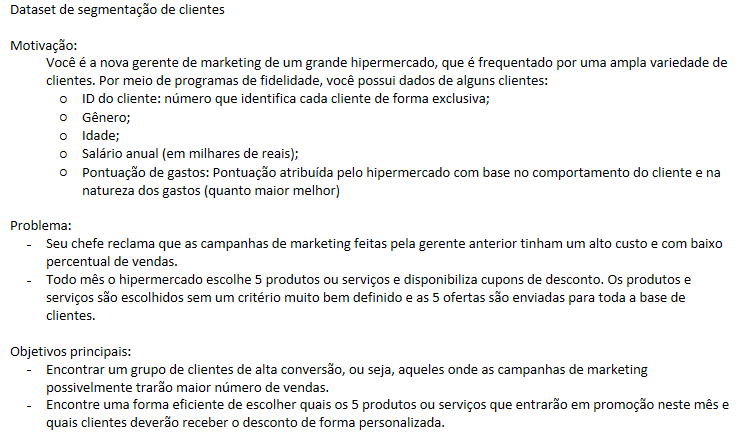

## Leitura dos dados

In [49]:
df_clientes = pd.read_csv('drive/MyDrive/ASA Arcelor Mittal 2023/data/Clientes_Hipermercado.csv')
df_clientes.head(10)

,id_cliente,genero,idade,salario_anual,pontuacao_de_gastos
0,1,masculino,19,30000,39
1,2,masculino,21,30000,81
2,3,feminino,20,32000,6
3,4,feminino,23,32000,77
4,5,feminino,31,34000,40
5,6,feminino,22,34000,76
6,7,feminino,35,36000,6
7,8,feminino,23,36000,94
8,9,masculino,64,38000,3
9,10,feminino,30,38000,72


## EDA - Análise Exploratória

In [50]:
df_clientes.describe()

,id_cliente,idade,salario_anual,pontuacao_de_gastos
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,121120.000000,50.200000
std,57.879185,13.969007,52529.442331,25.823522
min,1.000000,18.000000,30000.000000,1.000000
25%,50.750000,28.750000,83000.000000,34.750000
50%,100.500000,36.000000,123000.000000,50.000000
75%,150.250000,49.000000,156000.000000,73.000000
max,200.000000,70.000000,274000.000000,99.000000


In [51]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_cliente           200 non-null    int64 
 1   genero               200 non-null    object
 2   idade                200 non-null    int64 
 3   salario_anual        200 non-null    int64 
 4   pontuacao_de_gastos  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [52]:
# Analisando a distribuição das variáveis numéricas
variaveis_de_interesse = ['idade', 'salario_anual', 'pontuacao_de_gastos']
for col in variaveis_de_interesse:
  fig_hist = px.histogram(df_clientes[col], width=800, nbins=30)
  fig_hist.show()

In [53]:
# Proporção entre homens e mulheres
px.pie(values=df_clientes.value_counts(), names=df_clientes['genero'], width=800)

In [54]:
# Analisando a relação das variáveis numéricas com o gênero
for col in variaveis_de_interesse:
  fig_violin = px.violin(data_frame=df_clientes, x=col, color='genero', width=1200, box=True, points='all')
  fig_violin.show()

In [55]:
px.scatter(data_frame=df_clientes, x='salario_anual', y='pontuacao_de_gastos', title = 'Relação entre salário anual e a pontuação de gastos', width=1200)

**Parece haver uma relação entre salários anuais na faixa de 80k a 135k com puntuações de gastos na faixa de 40 a 60. Para as demais faixas salariais não parece haver muita relação.**

In [56]:
# Visualisando as 4 variáveis em um único gráfico
px.scatter_3d(data_frame=df_clientes, x='salario_anual', y='pontuacao_de_gastos', z='idade', color='genero', width=800)

## Normalização

In [57]:
## Fazendo a normalização com MinMaxScaler
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(df_clientes[variaveis_de_interesse])
df_normalizado = df_clientes.copy()
df_normalizado[variaveis_de_interesse] = pd.DataFrame(
    scaler.transform(df_clientes[variaveis_de_interesse]),
    columns=variaveis_de_interesse,
)

In [58]:
df_normalizado.describe()

,id_cliente,idade,salario_anual,pontuacao_de_gastos
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.400962,0.373443,0.502041
std,57.879185,0.268635,0.215285,0.263505
min,1.000000,0.000000,0.000000,0.000000
25%,50.750000,0.206731,0.217213,0.344388
50%,100.500000,0.346154,0.381148,0.500000
75%,150.250000,0.596154,0.516393,0.734694
max,200.000000,1.000000,1.000000,1.000000


## K-MEANS

Rodando o K-means para diferentes valores de k (número de clusters)

In [59]:
# A métrica de inércia indica o grau de variabilidade intracluster
# Ela é a soma das distâncias quadradas das amostras até o centro do cluster mais próximo,
# quanto mais desigual for cada cluster, maior a inércia

inercia_por_cluster  = []
silhuetas  = []
n_clusters = range(1, 11)
for k in n_clusters:
    print(f"Ajustando k-means com {k} clusters")
    model = sklearn.cluster.KMeans(n_clusters=k, random_state=42)
    model.fit(df_normalizado[variaveis_de_interesse])
    inercia_por_cluster.append(model.inertia_)

    #Calcula a métrica de silhueta (só pode ser calculada com 2 ou mais clusters)
    if k >=2:
      clusters = model.predict(df_normalizado[variaveis_de_interesse])
      silhouette = sklearn.metrics.silhouette_score(df_normalizado[variaveis_de_interesse], clusters)
      silhuetas.append(silhouette)

silhuetas.insert(0, np.nan)
df_resultados = pd.DataFrame(data={
    'n_clusters': n_clusters,
    'inercia': inercia_por_cluster,
    'silhueta': silhuetas
})

Ajustando k-means com 1 clusters
Ajustando k-means com 2 clusters
Ajustando k-means com 3 clusters
Ajustando k-means com 4 clusters
Ajustando k-means com 5 clusters
Ajustando k-means com 6 clusters
Ajustando k-means com 7 clusters
Ajustando k-means com 8 clusters
Ajustando k-means com 9 clusters
Ajustando k-means com 10 clusters


In [60]:
#Analisando qual o número de clusters ideal com base na inercia
px.line(data_frame=df_resultados, x='n_clusters', y='inercia', markers=True)

A métrica de inércia indica o grau de variabilidade intracluster. Ela é a soma das distâncias quadradas das amostras até o centro do cluster mais próximo. Quanto mais desigual for cada cluster, maior a inércia.

In [61]:
px.line(data_frame=df_resultados, x='n_clusters', y='silhueta', markers=True)

- O valor da silhueta é uma medida de quão semelhante um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação).
- A silhueta varia de -1 a +1, onde um valor alto indica que o objeto está bem combinado com seu próprio cluster e mal combinado com clusters vizinhos.
- Se a maioria dos objetos tiver um valor alto, a configuração de clustering será apropriada. Se muitos pontos tiverem um valor baixo ou negativo, a configuração de clustering pode ter muitos ou poucos clusters.

### Resultado para um número de clusters K

In [62]:
#Treinando para 2, 4, 5 e 6 clusters
model = sklearn.cluster.KMeans(n_clusters=2, random_state=42)
df_clientes['cluster_km2'] = model.fit_predict(df_normalizado[variaveis_de_interesse])

model = sklearn.cluster.KMeans(n_clusters=4, random_state=42)
df_clientes['cluster_km4'] = model.fit_predict(df_normalizado[variaveis_de_interesse])

model = sklearn.cluster.KMeans(n_clusters=5, random_state=42)
df_clientes['cluster_km5'] = model.fit_predict(df_normalizado[variaveis_de_interesse])

model = sklearn.cluster.KMeans(n_clusters=6, random_state=42)
df_clientes['cluster_km6'] = model.fit_predict(df_normalizado[variaveis_de_interesse])

In [63]:
df_clientes.head()

,id_cliente,genero,idade,salario_anual,pontuacao_de_gastos,cluster_km2,cluster_km4,cluster_km5,cluster_km6
0,1,masculino,19,30000,39,1,0,2,2
1,2,masculino,21,30000,81,1,0,4,4
2,3,feminino,20,32000,6,0,0,2,2
3,4,feminino,23,32000,77,1,0,4,4
4,5,feminino,31,34000,40,1,0,2,2


In [64]:
cluster_names = ['cluster_km2', 'cluster_km4', 'cluster_km5', 'cluster_km6']
for cluster_name in cluster_names:
  fig_3d = px.scatter_3d(data_frame=df_clientes, x='salario_anual', y='pontuacao_de_gastos', z='idade', color=cluster_name, width=800, color_continuous_scale='viridis')
  fig_3d.show()

### Analisando os clusters

Uma das partes mais importantes (e mais difíceis) do aprendizado não supervisionado é saber o que são cada um dos clusters, ou seja, quais características aquele grupo de indivíduos compartilha.

Com essas informações, seremos capazes de auxiliar em importantes decisões.

In [71]:
df_clientes['cluster_km5'].value_counts()

0    58
2    49
1    40
3    30
4    23
Name: cluster_km5, dtype: int64

In [66]:
for var in variaveis_de_interesse:
  fig_histogram = px.histogram(data_frame=df_clientes, x=var, color='cluster_km5', width=1200, title=f'Analise da variável {var}', nbins=30)
  fig_histogram.show()

In [67]:
for cluster_number in range(5):
  df_filtrado = df_clientes.loc[df_clientes['cluster_km5']==cluster_number]
  fig_pizza = px.pie(values=df_filtrado.value_counts(), names=df_filtrado['genero'], width=500, height=500, title=f'Analise do Cluster {cluster_number}')
  fig_pizza.show()

In [68]:
#Tabela de resumo estatístico (média)
df_clientes[['idade', 'salario_anual', 'pontuacao_de_gastos', 'cluster_km5']].groupby('cluster_km5').mean().style.background_gradient(axis=0)

,idade,salario_anual,pontuacao_de_gastos
cluster_km5,,,
0,55.551724,96965.517241,41.775862
1,32.875000,172200.000000,81.525000
2,27.061224,103959.183673,41.040816
3,44.000000,180266.666667,17.933333
4,25.521739,52608.695652,78.565217


In [69]:
#Tabela de resumo estatístico (desvio padrão)
df_clientes[['idade', 'salario_anual', 'pontuacao_de_gastos', 'cluster_km5']].groupby('cluster_km5').std().style.background_gradient(axis=0)

,idade,salario_anual,pontuacao_de_gastos
cluster_km5,,,
0,8.324920,27594.154935,15.658688
1,3.857643,32678.072315,9.999968
2,7.212282,35304.602618,15.900680
3,8.081482,33838.290221,9.888807
4,5.273170,15787.622109,10.953729


## DESAFIO

Encontrar um grupo de clientes de alta conversão, ou seja, aqueles onde as campanhas de marketing trarão maior número de vendas;

- Disparadamente os grupos 4 e 1, com altas pontuações de gasto (com desvio padrao mais baixo).
- Grupos 0 e 2: pontuação de gastos parecidos, desvio padrao baixo
- Grupo 3: descartamos

Escolha quais os 5 produtos que entrarão em promoção neste mês e quais clientes receberão o desconto de forma personalizada;

- Grupo 1: utensílios para o lar, produtos de limpeza. Produtos: cif cremoso, airfryer. Justificativa: pessoas com a média de 32 anos = pessoas com salários mais elevados que estão iniciando suas vidas em suas casas.

- Grupo 4: modinhas em geral. Produtos: fini carmed, creme hidratante caju da l'occitane, shampoo do CR7. Justificativa: pessoas altamente influenciáveis por propagandas e redes sociais.

- Grupos 0 e 2: bebidas alcoólicas. Produtos: heineken, vinhos selecionados (se fosse para esolher um grupo seria o 0). Justificativa: questão da idade.

*sua resposta aqui